# Get the Data 

In [1]:
import pandas as pd 

data = pd.read_csv("../datasets/attribute_set/train_val_data_fine_grained_all.csv", index_col=0) 

In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   paths            16000 non-null  object
 1   floral           16000 non-null  int64 
 2   graphic          16000 non-null  int64 
 3   striped          16000 non-null  int64 
 4   embroidered      16000 non-null  int64 
 5   pleated          16000 non-null  int64 
 6   solid            16000 non-null  int64 
 7   lattice          16000 non-null  int64 
 8   long_sleeve      16000 non-null  int64 
 9   short_sleeve     16000 non-null  int64 
 10  sleeveless       16000 non-null  int64 
 11  maxi_length      16000 non-null  int64 
 12  mini_length      16000 non-null  int64 
 13  no_dress         16000 non-null  int64 
 14  crew_neckline    16000 non-null  int64 
 15  v_neckline       16000 non-null  int64 
 16  square_neckline  16000 non-null  int64 
 17  no_neckline      16000 non-null 

In [3]:
data["paths"] = data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))
data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img_highres/img_highres/Swe...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,../datasets/big_ds/img_highres/img_highres/Cla...,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,../datasets/big_ds/img_highres/img_highres/Str...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img_highres/img_highres/Mid...,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Zip...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [5]:
data = data.loc[:, [
    "paths",
    "floral", 
    "graphic" ,
    "striped",
    "embroidered",
    "solid",
    "lattice",
    "denim",
    "chiffon",
    "cotton",
    "leather",
    "faux",
    "knit",
    "tight",
    "loose"
]]

In [6]:
data.columns = [
    "paths",
    "cicekli", 
    "baskili", 
    "duz-cizgi",
    "islemeli", 
    "solid", 
    "kafes",
    "denim",
    "sifon", 
    "pamuk", 
    "deri", 
    "kurk", 
    "orme", 
    "dar",
    "bol-gevsek" 
]

In [7]:
for c in data.columns[1:]: 
    print(f"{c} , positive: {len(data[data[c] == 1])} negative: {len(data[data[c] == 0])} ")

cicekli , positive: 2738 negative: 13262 
baskili , positive: 2678 negative: 13322 
duz-cizgi , positive: 1055 negative: 14945 
islemeli , positive: 1329 negative: 14671 
solid , positive: 7584 negative: 8416 
kafes , positive: 280 negative: 15720 
denim , positive: 949 negative: 15051 
sifon , positive: 2342 negative: 13658 
pamuk , positive: 10868 negative: 5132 
deri , positive: 330 negative: 15670 
kurk , positive: 143 negative: 15857 
orme , positive: 1368 negative: 14632 
dar , positive: 2296 negative: 13704 
bol-gevsek , positive: 868 negative: 15132 


In [8]:
# data = data.drop(["kafes", "deri", "kurk"], axis=1) 

In [9]:
DATA_SIZE = data.shape[0]
TRAIN_SIZE = int(0.70 * DATA_SIZE)
TRAIN_SIZE 

11200

# Shuffle Training Data 

In [10]:
data = data.sample(frac=1, random_state=128)
trainig_data = data.iloc[:TRAIN_SIZE, :].reset_index(drop=True)
val_data = data.iloc[TRAIN_SIZE:, :].reset_index(drop=True)
trainig_data.shape, val_data.shape, data.shape 

((11200, 15), (4800, 15), (16000, 15))

In [11]:
trainig_data.head() 

,paths,cicekli,baskili,duz-cizgi,islemeli,solid,kafes,denim,sifon,pamuk,deri,kurk,orme,dar,bol-gevsek
0,../datasets/big_ds/img_highres/img_highres/Cow...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,../datasets/big_ds/img_highres/img_highres/Dip...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,../datasets/big_ds/img_highres/img_highres/Hea...,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,../datasets/big_ds/img_highres/img_highres/Dai...,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img_highres/img_highres/Tas...,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# Distribution of Train - Val Set 

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 

def show_distribution(dt: pd.DataFrame):
    train_dist = dict()
    for c in dt.columns[1:]: 
        train_dist[c] = len(dt[dt[c] == 1]) 

    train_dist = pd.DataFrame.from_dict(train_dist, orient="index").reset_index()
    train_dist.columns= ["rows", "vals"]

    sns.barplot(x="rows", y="vals", data=train_dist)
    plt.show()

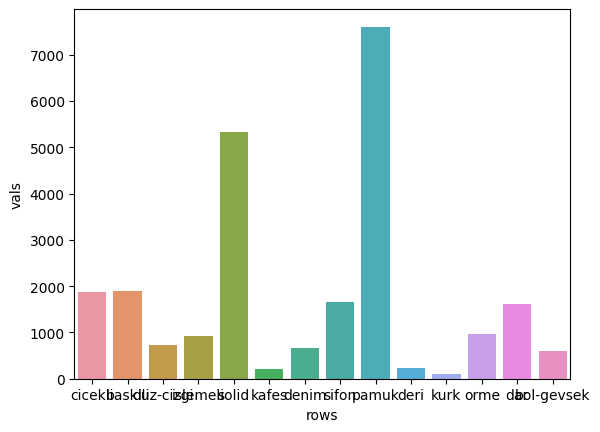

In [13]:
show_distribution(trainig_data)

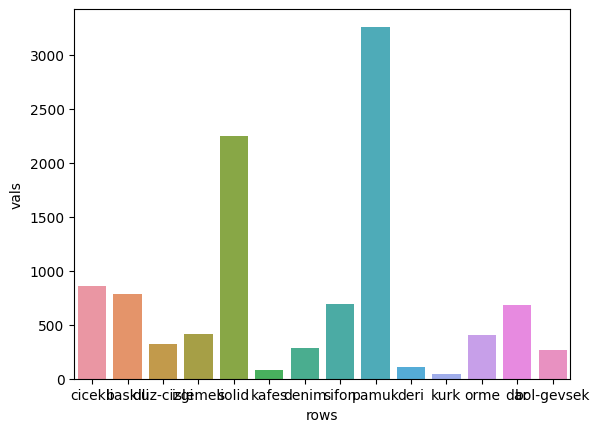

In [14]:
show_distribution(val_data)

# Create Keras Data Generators 

In [15]:
X_train = trainig_data.iloc[:, 0] 
y_train = trainig_data.iloc[:, 1:]

X_test = val_data.iloc[:, 0] 
y_test = val_data.iloc[:, 1:] 

In [16]:
merged_all_classes = [] 
for idx, row in y_train.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_train = pd.Series(merged_all_classes, index=y_train.index, name="labels") 

merged_all_classes = [] 
for idx, row in y_test.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test = pd.Series(merged_all_classes, index=y_test.index, name="labels") 

In [17]:
train_data_flow_df = pd.concat([
    X_train, 
    y_train
], axis=1)

test_data_flow_df = pd.concat([
    X_test, 
    y_test
], axis=1) 

In [18]:
IMG_WIDTH = 456 
IMG_HEIGHT = 456 
nr_of_classes = 14

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_gen = ImageDataGenerator() 
test_gen = ImageDataGenerator()

In [20]:
train = train_gen.flow_from_dataframe(
    dataframe=train_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT))

test = test_gen.flow_from_dataframe(
    dataframe=test_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 11200 validated image filenames belonging to 14 classes.
Found 4800 validated image filenames belonging to 14 classes.


In [21]:
for b in train: 
    print(b[0].shape)
    break

(32, 456, 456, 3)


# Test Data 

In [22]:
test_data = pd.read_csv("../datasets/attribute_set/test_data_fine_grained.csv", index_col=0)
test_data["paths"] = test_data.paths.apply(lambda s: s.replace("img-001/img", "img_highres/img_highres"))

test_data = test_data.loc[:, [
    "paths",
    "floral", 
    "graphic" ,
    "striped",
    "embroidered",
    "solid",
    "lattice",
    "denim",
    "chiffon",
    "cotton",
    "leather",
    "faux",
    "knit",
    "tight",
    "loose"
]]

test_data.columns = [
    "paths",
    "cicekli", 
    "baskili", 
    "duz-cizgi",
    "islemeli", 
    "solid", 
    "kafes",
    "denim",
    "sifon", 
    "pamuk", 
    "deri", 
    "kurk", 
    "orme", 
    "dar",
    "bol-gevsek" 
]

test_data.head() 

,paths,cicekli,baskili,duz-cizgi,islemeli,solid,kafes,denim,sifon,pamuk,deri,kurk,orme,dar,bol-gevsek
0,../datasets/big_ds/img_highres/img_highres/Flo...,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,../datasets/big_ds/img_highres/img_highres/But...,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,../datasets/big_ds/img_highres/img_highres/Mar...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,../datasets/big_ds/img_highres/img_highres/Sun...,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,../datasets/big_ds/img_highres/img_highres/Col...,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [32]:
from PIL import Image
import os

max_pixel_limit = 178956970
batch=0
i = 0

for k,row in test_data.iterrows():
    try:
        image = Image.open(row["paths"])
        total_pixels = image.size[0] * image.size[1]
        if total_pixels > max_pixel_limit:
            print(f"Removed {i} - Exceeds pixel limit")

        i = i + 1 
        if i >= 31:
            i = 0 
            batch = batch + 1 
    except Exception as e:
        print(f"batch:{batch} index:{k}")



In [ ]:
test_data = test_data.drop([3778])

In [33]:
X_test2 = test_data.iloc[:, 0] 
y_test2 = test_data.iloc[:, 1:] 

merged_all_classes = [] 
for idx, row in y_test2.iterrows():
    merged_all_classes.append([col for col, val in row.items() if val == 1])

y_test2 = pd.Series(merged_all_classes, index=y_test2.index, name="labels") 

test2_data_flow_df = pd.concat([
    X_test2, 
    y_test2
], axis=1) 

In [34]:
test2_gen = ImageDataGenerator() 
test_2 = test2_gen.flow_from_dataframe(
    dataframe=test2_data_flow_df, 
    directory="", 
    x_col="paths", 
    y_col="labels", 
    class_mode='categorical', 
    target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 3999 validated image filenames belonging to 14 classes.


# Model 1: EfficientNetB5 

In [45]:
from tensorflow import keras 
import tensorflow as tf 

In [46]:
efficient_net = tf.keras.applications.EfficientNetB5(include_top=False)
efficient_net.trainable = False

In [47]:
from tensorflow import keras 

inputs = keras.Input(shape=(IMG_WIDTH,IMG_HEIGHT,3)) 
x = efficient_net(inputs) 
x = keras.layers.GlobalAveragePooling2D()(x) 

initializer = tf.keras.initializers.GlorotUniform(seed=42) 
activation = tf.keras.activations.sigmoid  
kernel_regularizer = tf.keras.regularizers.l2(0.01)
outputs = keras.layers.Dense(nr_of_classes,
                             kernel_initializer=initializer, 
                             kernel_regularizer = kernel_regularizer,
                             activation=activation)(x) 

model_1 = keras.Model(inputs, outputs) 

In [48]:
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall')
]


model_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=METRICS)

In [49]:
checkpoint_path = "checkpoints/high_res_true_fine_grained_reg/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1)

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [50]:
history_model_1 = model_1.fit(train, 
        validation_data =test,
        epochs=20,
        callbacks=[checkpoint_callback])

Epoch 1/20
350/350 [==============================] - ETA: 0s - loss: 0.3727 - accuracy: 0.8906 - precision: 0.7234 - recall: 0.4794 
Epoch 1: saving model to checkpoints/high_res_true_fine_grained_reg\checkpoint-1.ckpt
350/350 [==============================] - 5121s 15s/step - loss: 0.3727 - accuracy: 0.8906 - precision: 0.7234 - recall: 0.4794 - val_loss: 0.3326 - val_accuracy: 0.8935 - val_precision: 0.7437 - val_recall: 0.4822
Epoch 2/20
350/350 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8953 - precision: 0.7486 - recall: 0.4907
Epoch 2: saving model to checkpoints/high_res_true_fine_grained_reg\checkpoint-2.ckpt
350/350 [==============================] - 3697s 11s/step - loss: 0.3303 - accuracy: 0.8953 - precision: 0.7486 - recall: 0.4907 - val_loss: 0.3268 - val_accuracy: 0.8959 - val_precision: 0.7607 - val_recall: 0.4837
Epoch 3/20
350/350 [==============================] - ETA: 0s - loss: 0.3248 - accuracy: 0.8946 - precision: 0.7481 - recall: 0.4

In [ ]:
# model_2.save("../trained_models/model_2_efficientnet_SHUFFLEDdata_fine_grained_vgg.h5") 

In [ ]:
# from helpers import save_with_pickle
# save_with_pickle("../trained_models/model_2_efficientnet_SHUFFLEDdata_fine_grained_vgg_HISTORY.pickle", history_model_2.history)

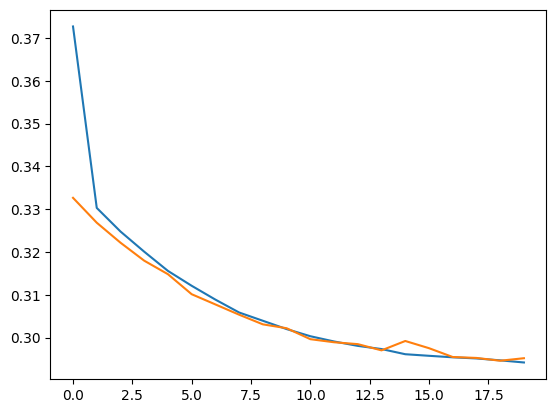

In [51]:
from matplotlib import pyplot as plt 

plt.plot(pd.DataFrame(history_model_1.history)[["loss", "val_loss"]])
plt.show()

### Model 2 Fine Tune

In [53]:
efficient_net.trainable = True  

for layer in efficient_net.layers[:-15]:
    layer.trainable = False 

model_1.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=METRICS)

In [54]:
history_model_1_fine = model_1.fit(train, 
        validation_data =test,
        epochs=40, 
        initial_epoch=history_model_1.epoch[-1], # start from previous last epoch 
        callbacks=[checkpoint_callback])

Epoch 20/40
350/350 [==============================] - ETA: 0s - loss: 0.2359 - accuracy: 0.9086 - precision: 0.7836 - recall: 0.5693 
Epoch 20: saving model to checkpoints/high_res_true_fine_grained_reg\checkpoint-20.ckpt
350/350 [==============================] - 4517s 13s/step - loss: 0.2359 - accuracy: 0.9086 - precision: 0.7836 - recall: 0.5693 - val_loss: 0.2126 - val_accuracy: 0.9232 - val_precision: 0.7953 - val_recall: 0.6827
Epoch 21/40
350/350 [==============================] - ETA: 0s - loss: 0.2109 - accuracy: 0.9236 - precision: 0.8072 - recall: 0.6677
Epoch 21: saving model to checkpoints/high_res_true_fine_grained_reg\checkpoint-21.ckpt
350/350 [==============================] - 4188s 12s/step - loss: 0.2109 - accuracy: 0.9236 - precision: 0.8072 - recall: 0.6677 - val_loss: 0.2076 - val_accuracy: 0.9232 - val_precision: 0.8036 - val_recall: 0.6705
Epoch 22/40
176/350 [==============>...............] - ETA: 29:44 - loss: 0.2011 - accuracy: 0.9272 - precision: 0.8175 - r

In [ ]:
# model_2.save("../trained_models/fine_model_2_fine_grained_vgg.h5") 

In [55]:
def compare_historys(original_history, new_history, initial_epochs=10):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """ 
    # Get original history measurements
    loss = original_history.history["loss"]

    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_loss = loss + new_history.history["loss"]

    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

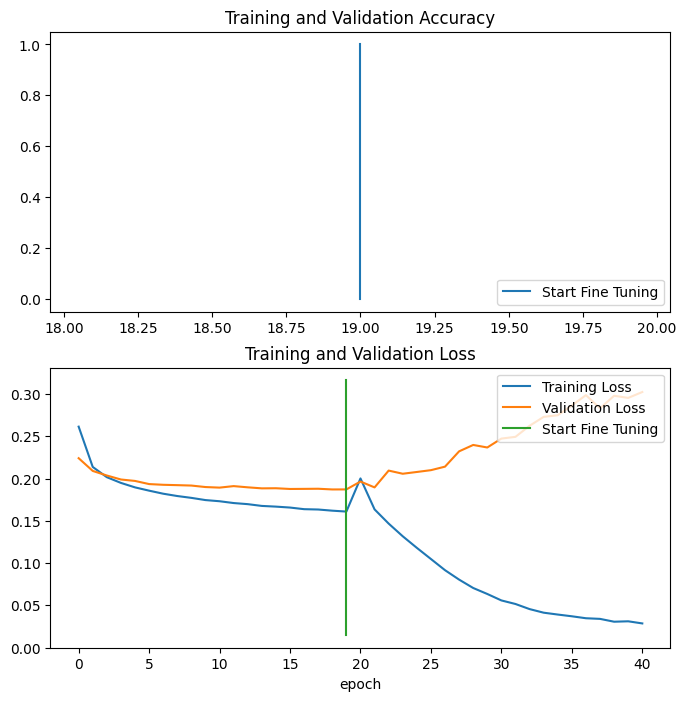

In [57]:
compare_historys(history_model_1, history_model_1_fine, 20)

<Axes: >

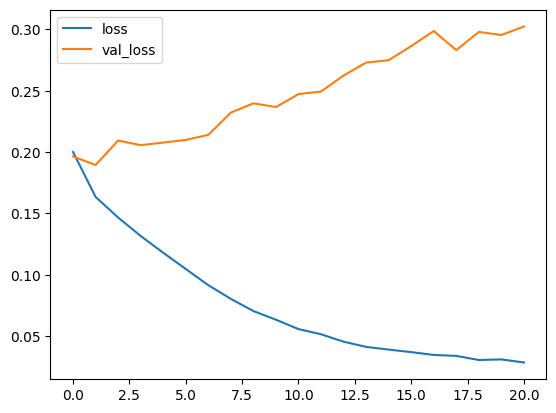

In [59]:
pd.DataFrame(history_model_1_fine.history)[["loss", "val_loss"]].plot()

In [62]:
model_1.load_weights("./checkpoints/high_res_true_fine_grained/checkpoint-21.ckpt")

In [63]:
model_1.save("../trained_models/efnet_high_res_based12.h5")

# Coarse to fine 

In [40]:
from sklearn.model_selection import ParameterGrid 
import numpy as np

parameters = {
    'batch_size': [32, 64],
    'learning_rate': [10**(-4 * np.random.rand()) for i in range(7)],
    'freeze': [False, True],
    'regularization': [ {"type": "l2", "rate": 0.01}, {"type": 'dropout', "rate": 0.2}]
}

len(list(ParameterGrid(parameters)))

56

In [41]:
def get_generator(batch_size:int, random_state: int, target_size): 
    train_gen_grid = ImageDataGenerator() 
    test_gen_grid = ImageDataGenerator()

    train_grid = train_gen_grid.flow_from_dataframe(
        dataframe=train_data_flow_df, 
        directory="", 
        x_col="paths", 
        y_col="labels", 
        seed=random_state, 
        class_mode='categorical', 
        batch_size=batch_size,
        target_size=target_size)

    test_grid = test_gen_grid.flow_from_dataframe(
        dataframe=test_data_flow_df, 
        directory="", 
        x_col="paths", 
        y_col="labels", 
        seed=random_state, 
        class_mode='categorical',
        batch_size=batch_size, 
        target_size=target_size)
    
    return train_grid, test_grid

In [42]:
def create_model(learning_rate, freeze: bool, regularization): 
    efficient_net = tf.keras.applications.EfficientNetB5(include_top=False)
    efficient_net.trainable = False

    if freeze: 
        efficient_net.trainable = True 
        for layer in efficient_net.layers[:-15]:
            layer.trainable = False 

    inputs = keras.Input(shape=(IMG_HEIGHT,IMG_WIDTH,3)) 
    x = efficient_net(inputs) 
    x = keras.layers.GlobalAveragePooling2D()(x) 
    
    kernel_regularizer = None 
    if regularization["type"] == "dropout": 
        x = keras.layers.Dropout(regularization["rate"])(x)
    elif regularization["type"] == "l2":
        kernel_regularizer = tf.keras.regularizers.l2(regularization["rate"])
    
    
    outputs = keras.layers.Dense(nr_of_classes,
                                kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42), 
                                kernel_regularizer = kernel_regularizer,
                                activation=tf.keras.activations.sigmoid)(x) 

    model = keras.Model(inputs, outputs) 
    METRICS = [
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
                metrics=METRICS)   
    
    return model

In [43]:
def try_fit(parameters_list: list): 
    historys = [] 
    i = 0
    for idx,parameter_set in enumerate(parameters_list):
        print(parameter_set)
        gen_train, gen_test = get_generator(parameter_set["batch_size"], random_state=64, target_size=(IMG_WIDTH, IMG_HEIGHT))
        model = create_model(learning_rate=parameter_set["learning_rate"], freeze=parameter_set["freeze"], regularization=parameter_set["regularization"]) 
        history = model.fit(gen_train, validation_data=gen_test, epochs=30) 
        historys.append({
            "model_id": idx, 
            "model_parameters": parameters_list, 
            "history": history.history,
            "model_weights": model.get_weights() 
        })
    
    return historys 

In [ ]:
histories_coarse_search = try_fit(list(ParameterGrid(parameters)))